In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
dir_of_interest = "Revised_All_Canines_List_2025_08_06"
subdir_of_interest = f"{dir_of_interest}/Locus_Sharing"
list_of_genomes = ["Mischka","Nala","Tasha","Zoey","Sandy","Clu"]
reference_genome = "mCanlor"

if not os.path.exists(subdir_of_interest):
    os.mkdir(subdir_of_interest)
    
def acceptable_chroms():
    a_chroms = []
    for i in range(1,39):
        a_chroms.append(f"chr{i}")
    a_chroms.append("chrX")
    print(a_chroms)
    return a_chroms

chrom_list = acceptable_chroms()

['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chr23', 'chr24', 'chr25', 'chr26', 'chr27', 'chr28', 'chr29', 'chr30', 'chr31', 'chr32', 'chr33', 'chr34', 'chr35', 'chr36', 'chr37', 'chr38', 'chrX']


[['LINEs', 'query'], ['LINEs', 'ref'], ['SINEs', 'query'], ['SINEs', 'ref']]
Mischka
1962
Nala
1955
Tasha
1939
Zoey
1957
Sandy
2220
Clu
1530


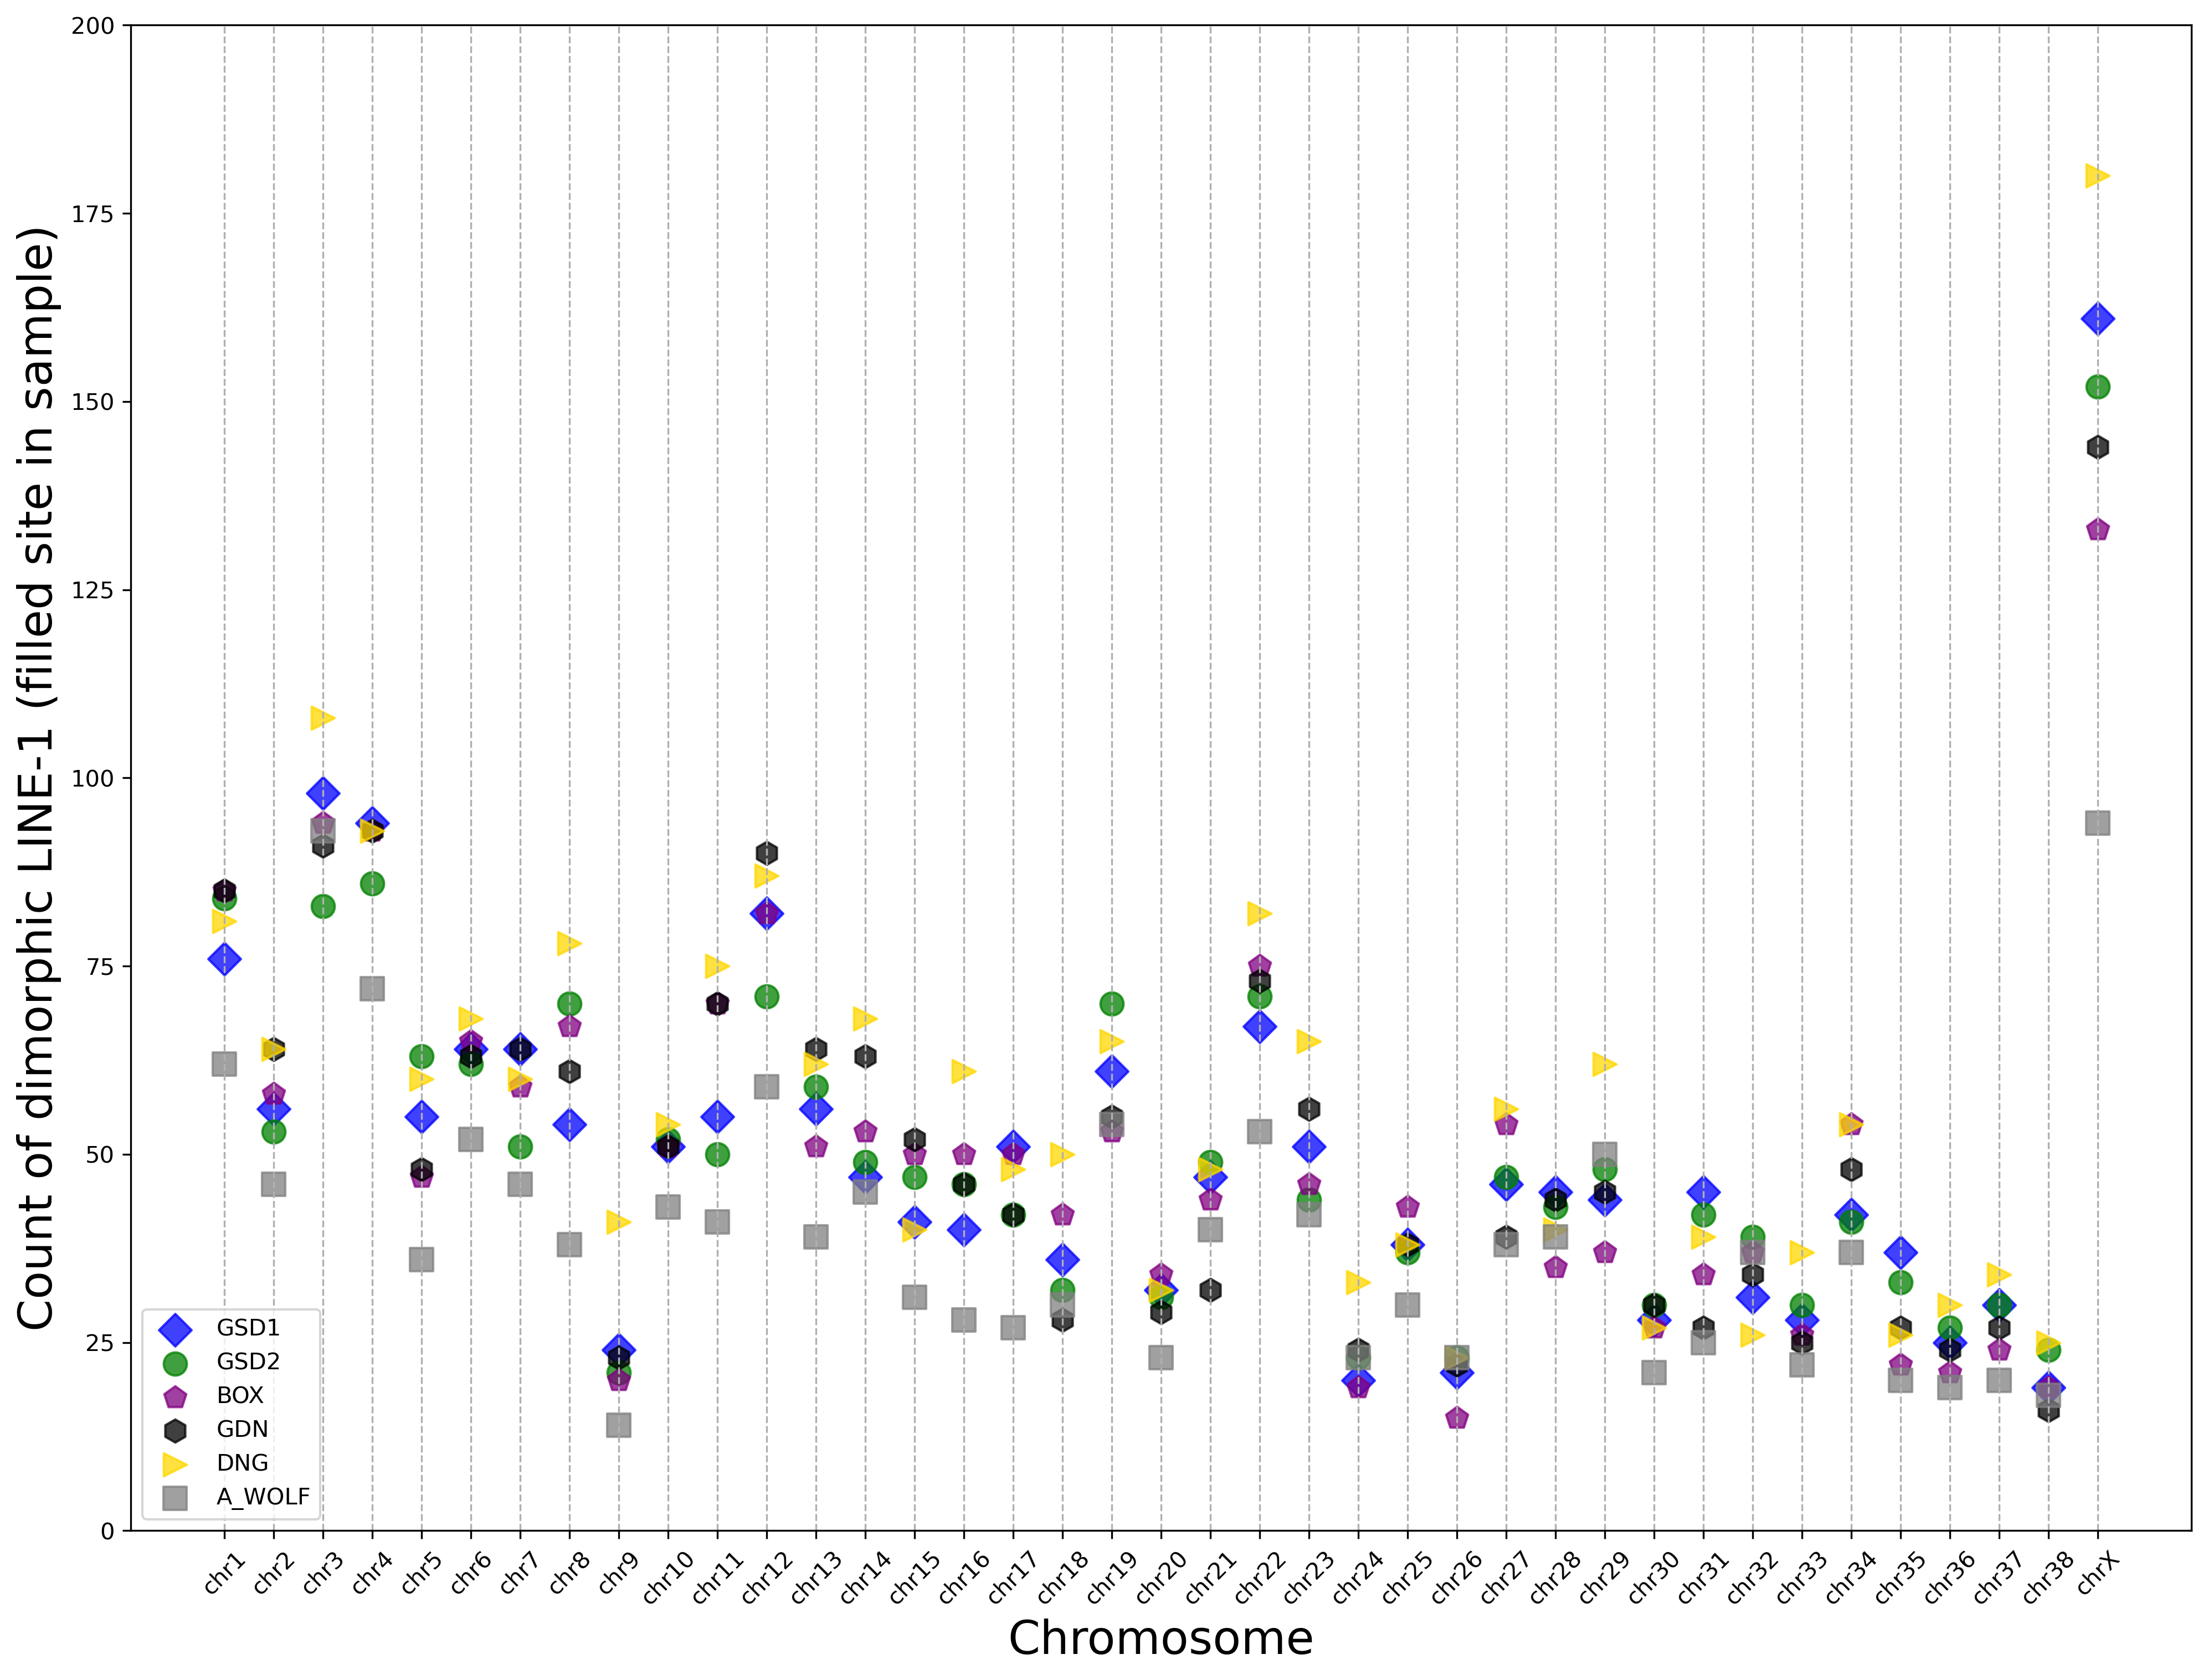

Mischka
1831
Nala
1855
Tasha
1831
Zoey
1879
Sandy
1841
Clu
1718


<Figure size 432x288 with 0 Axes>

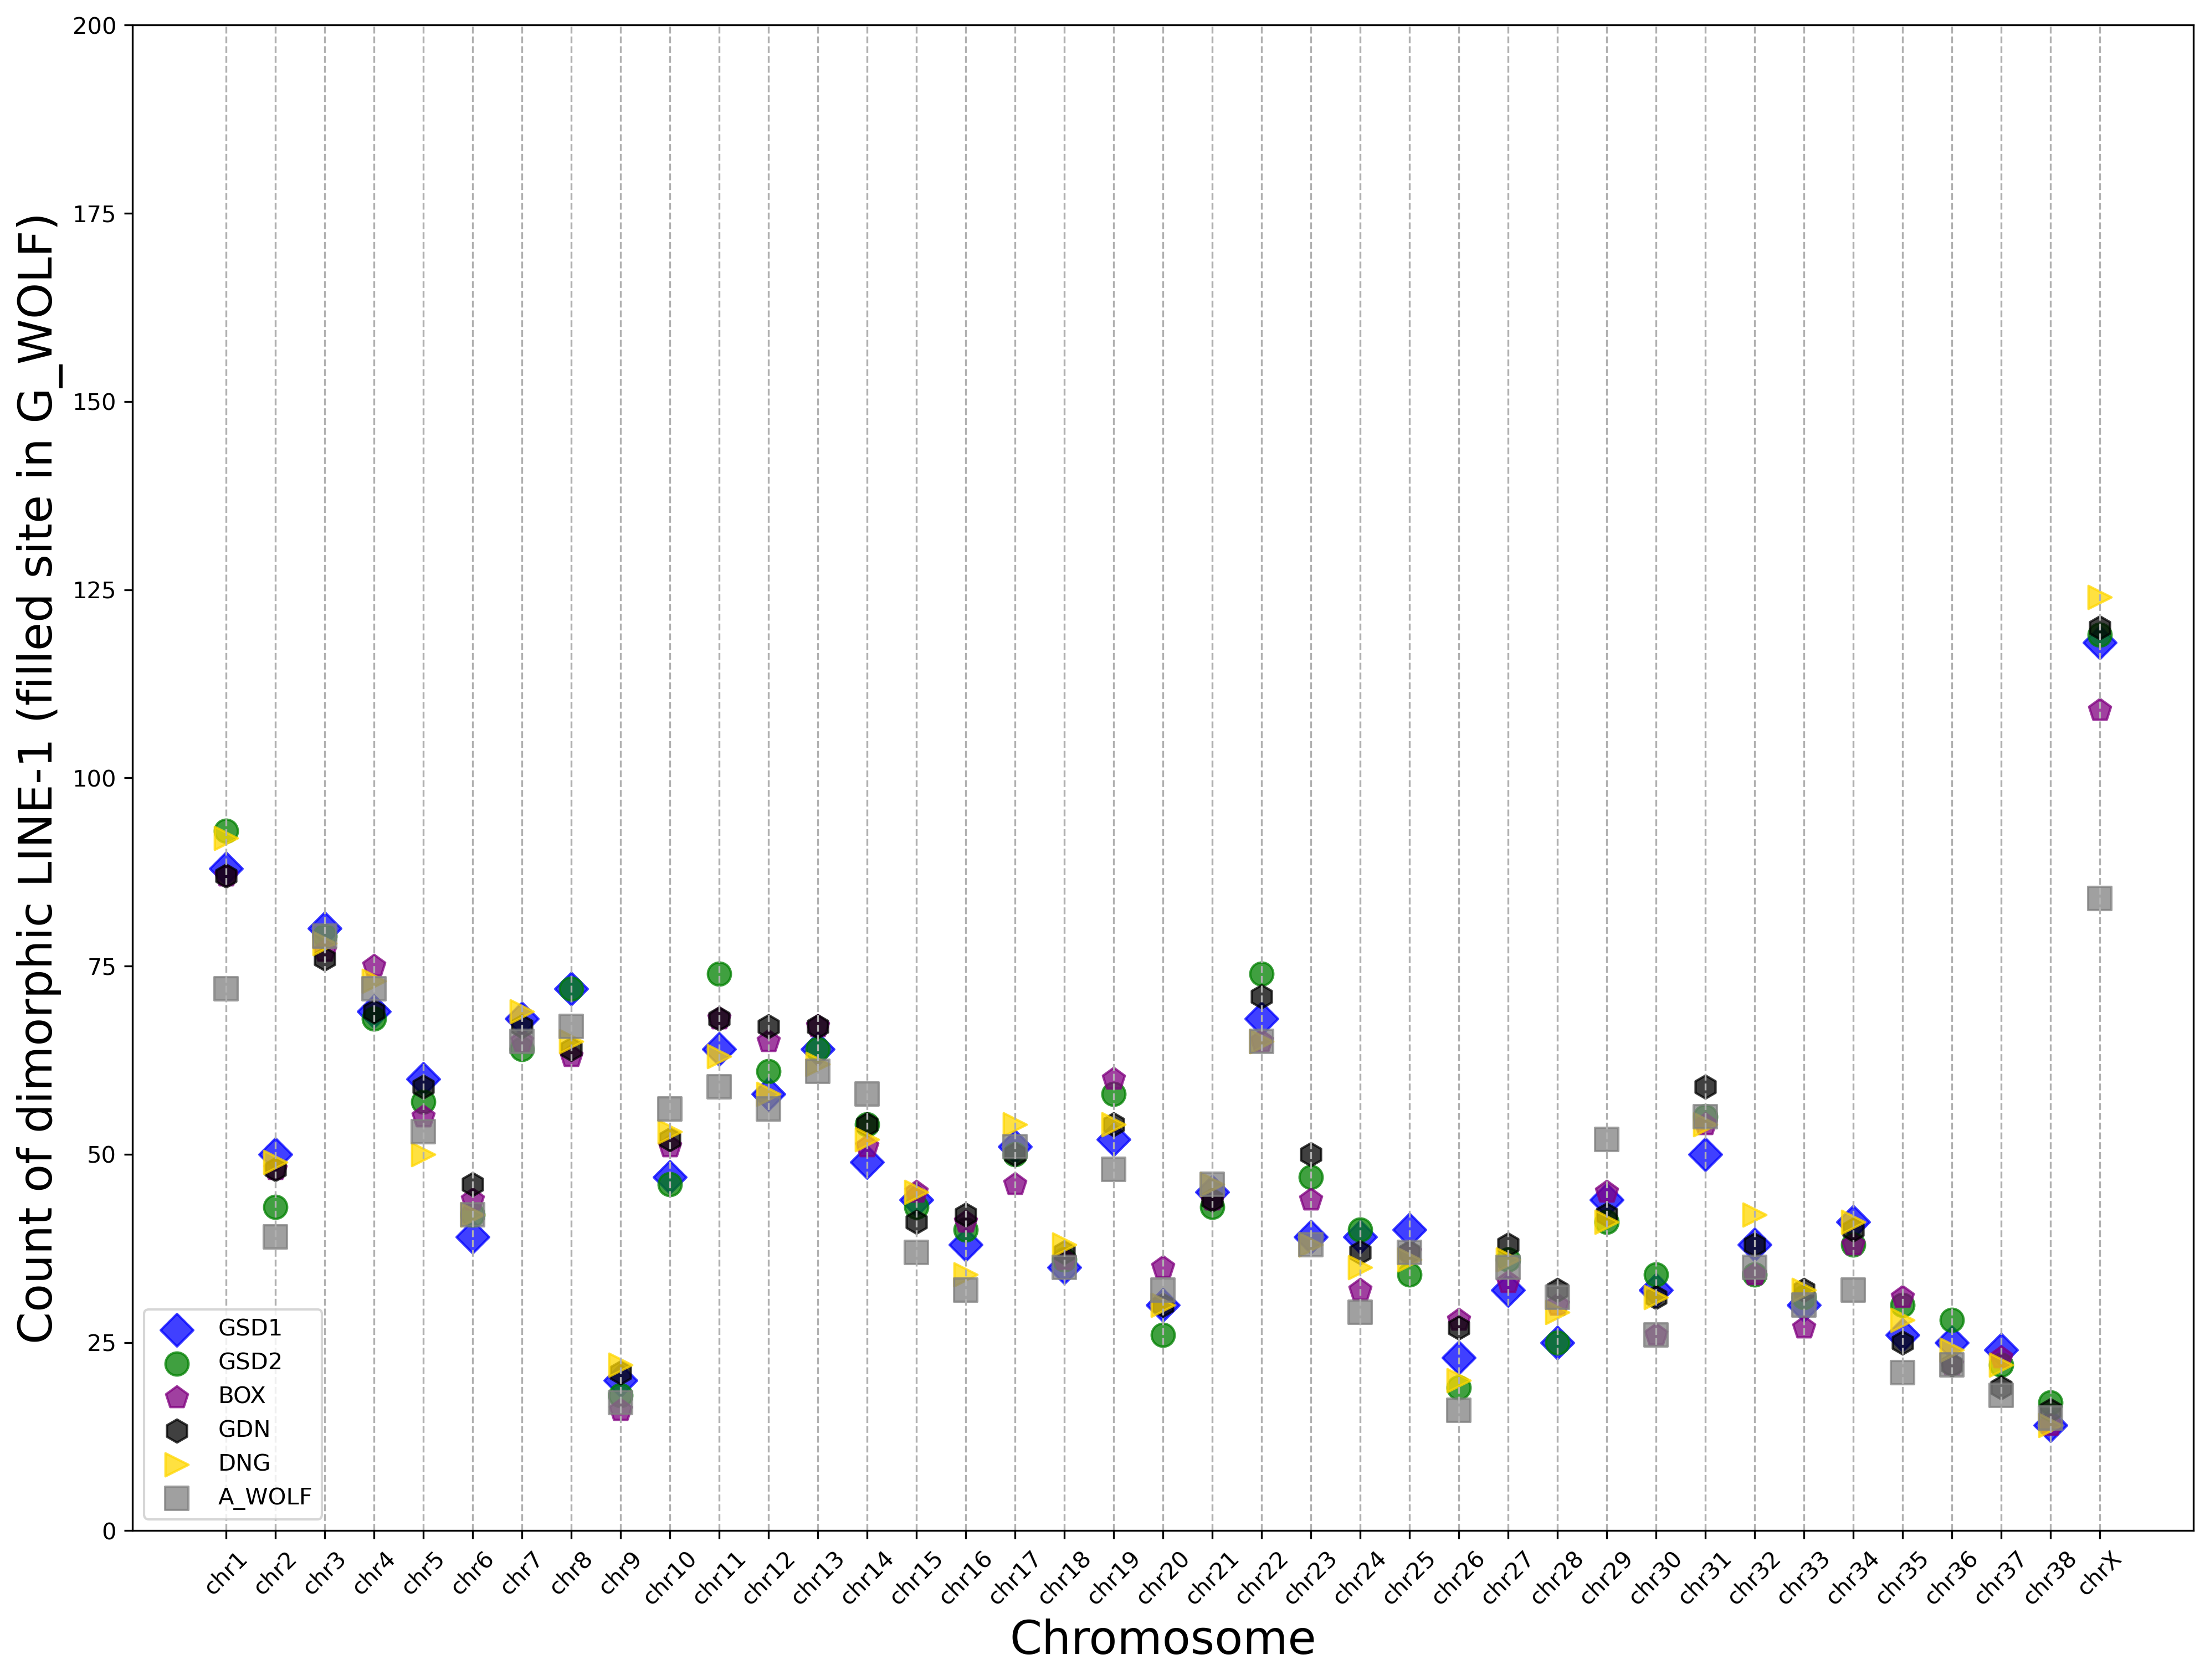

Mischka
14543
Nala
14362
Tasha
10641
Zoey
12575
Sandy
15147
Clu
12801


<Figure size 432x288 with 0 Axes>

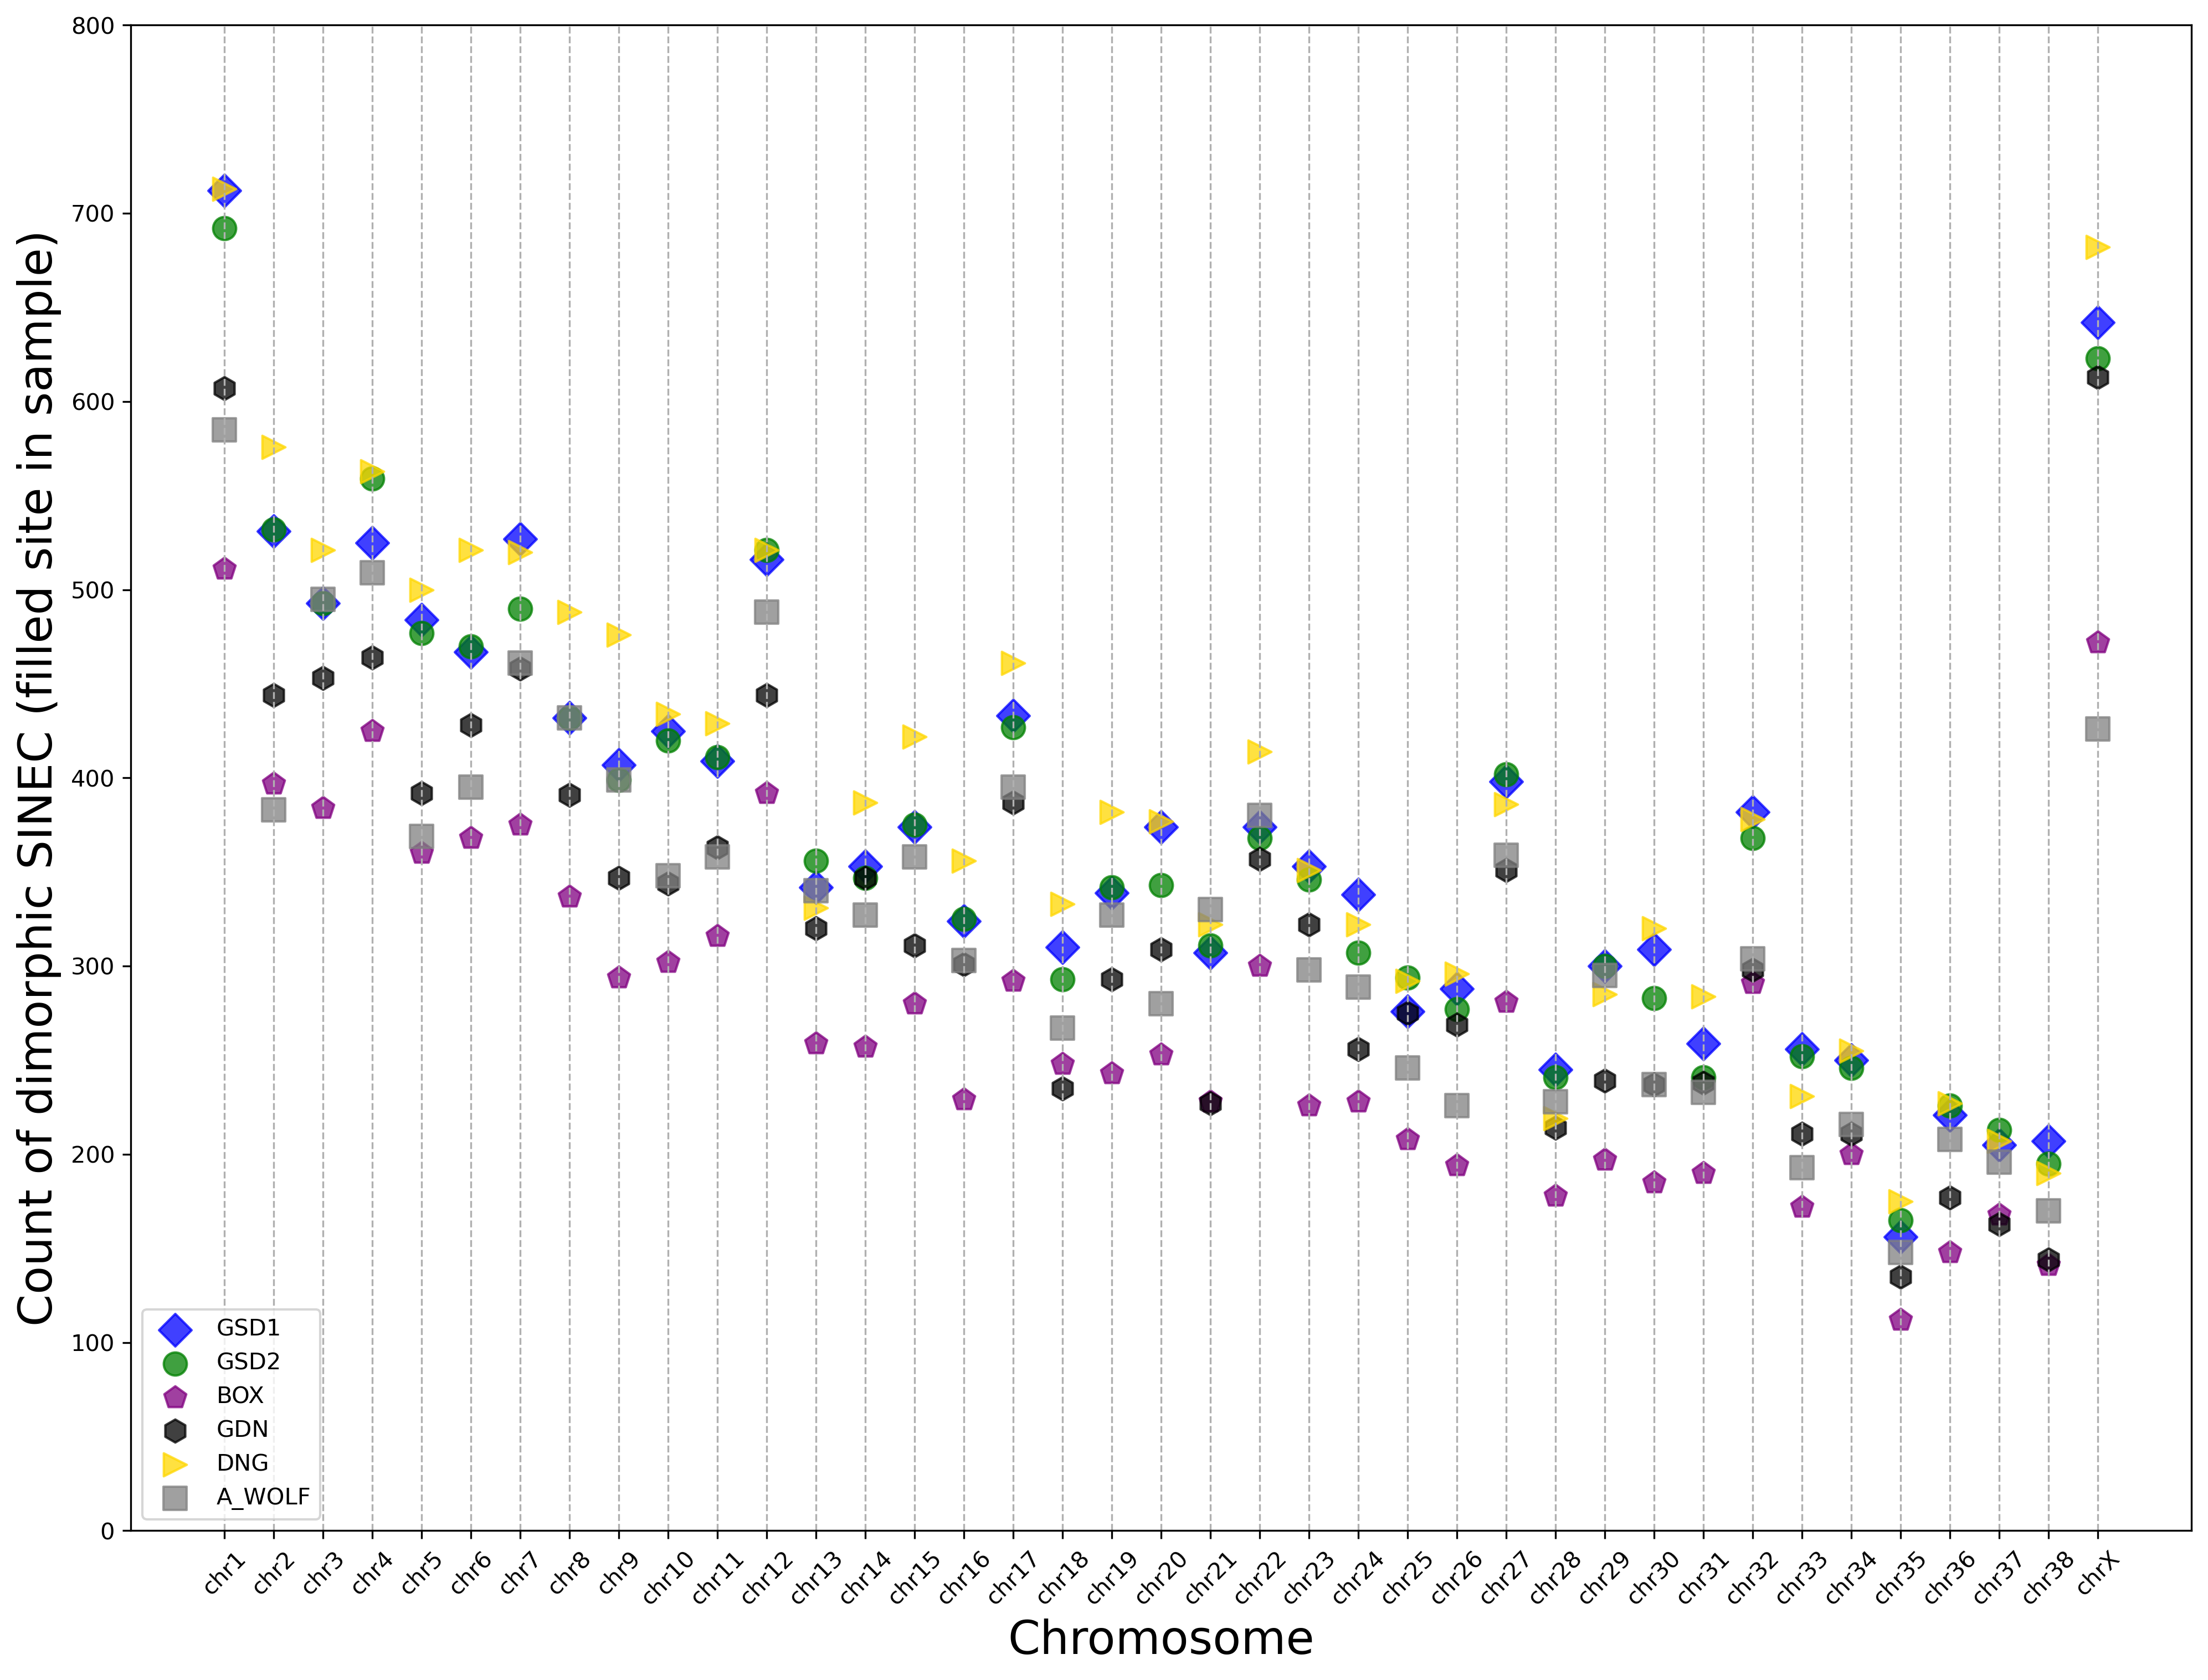

Mischka
13180
Nala
13240
Tasha
13626
Zoey
13672
Sandy
13504
Clu
12637


<Figure size 432x288 with 0 Axes>

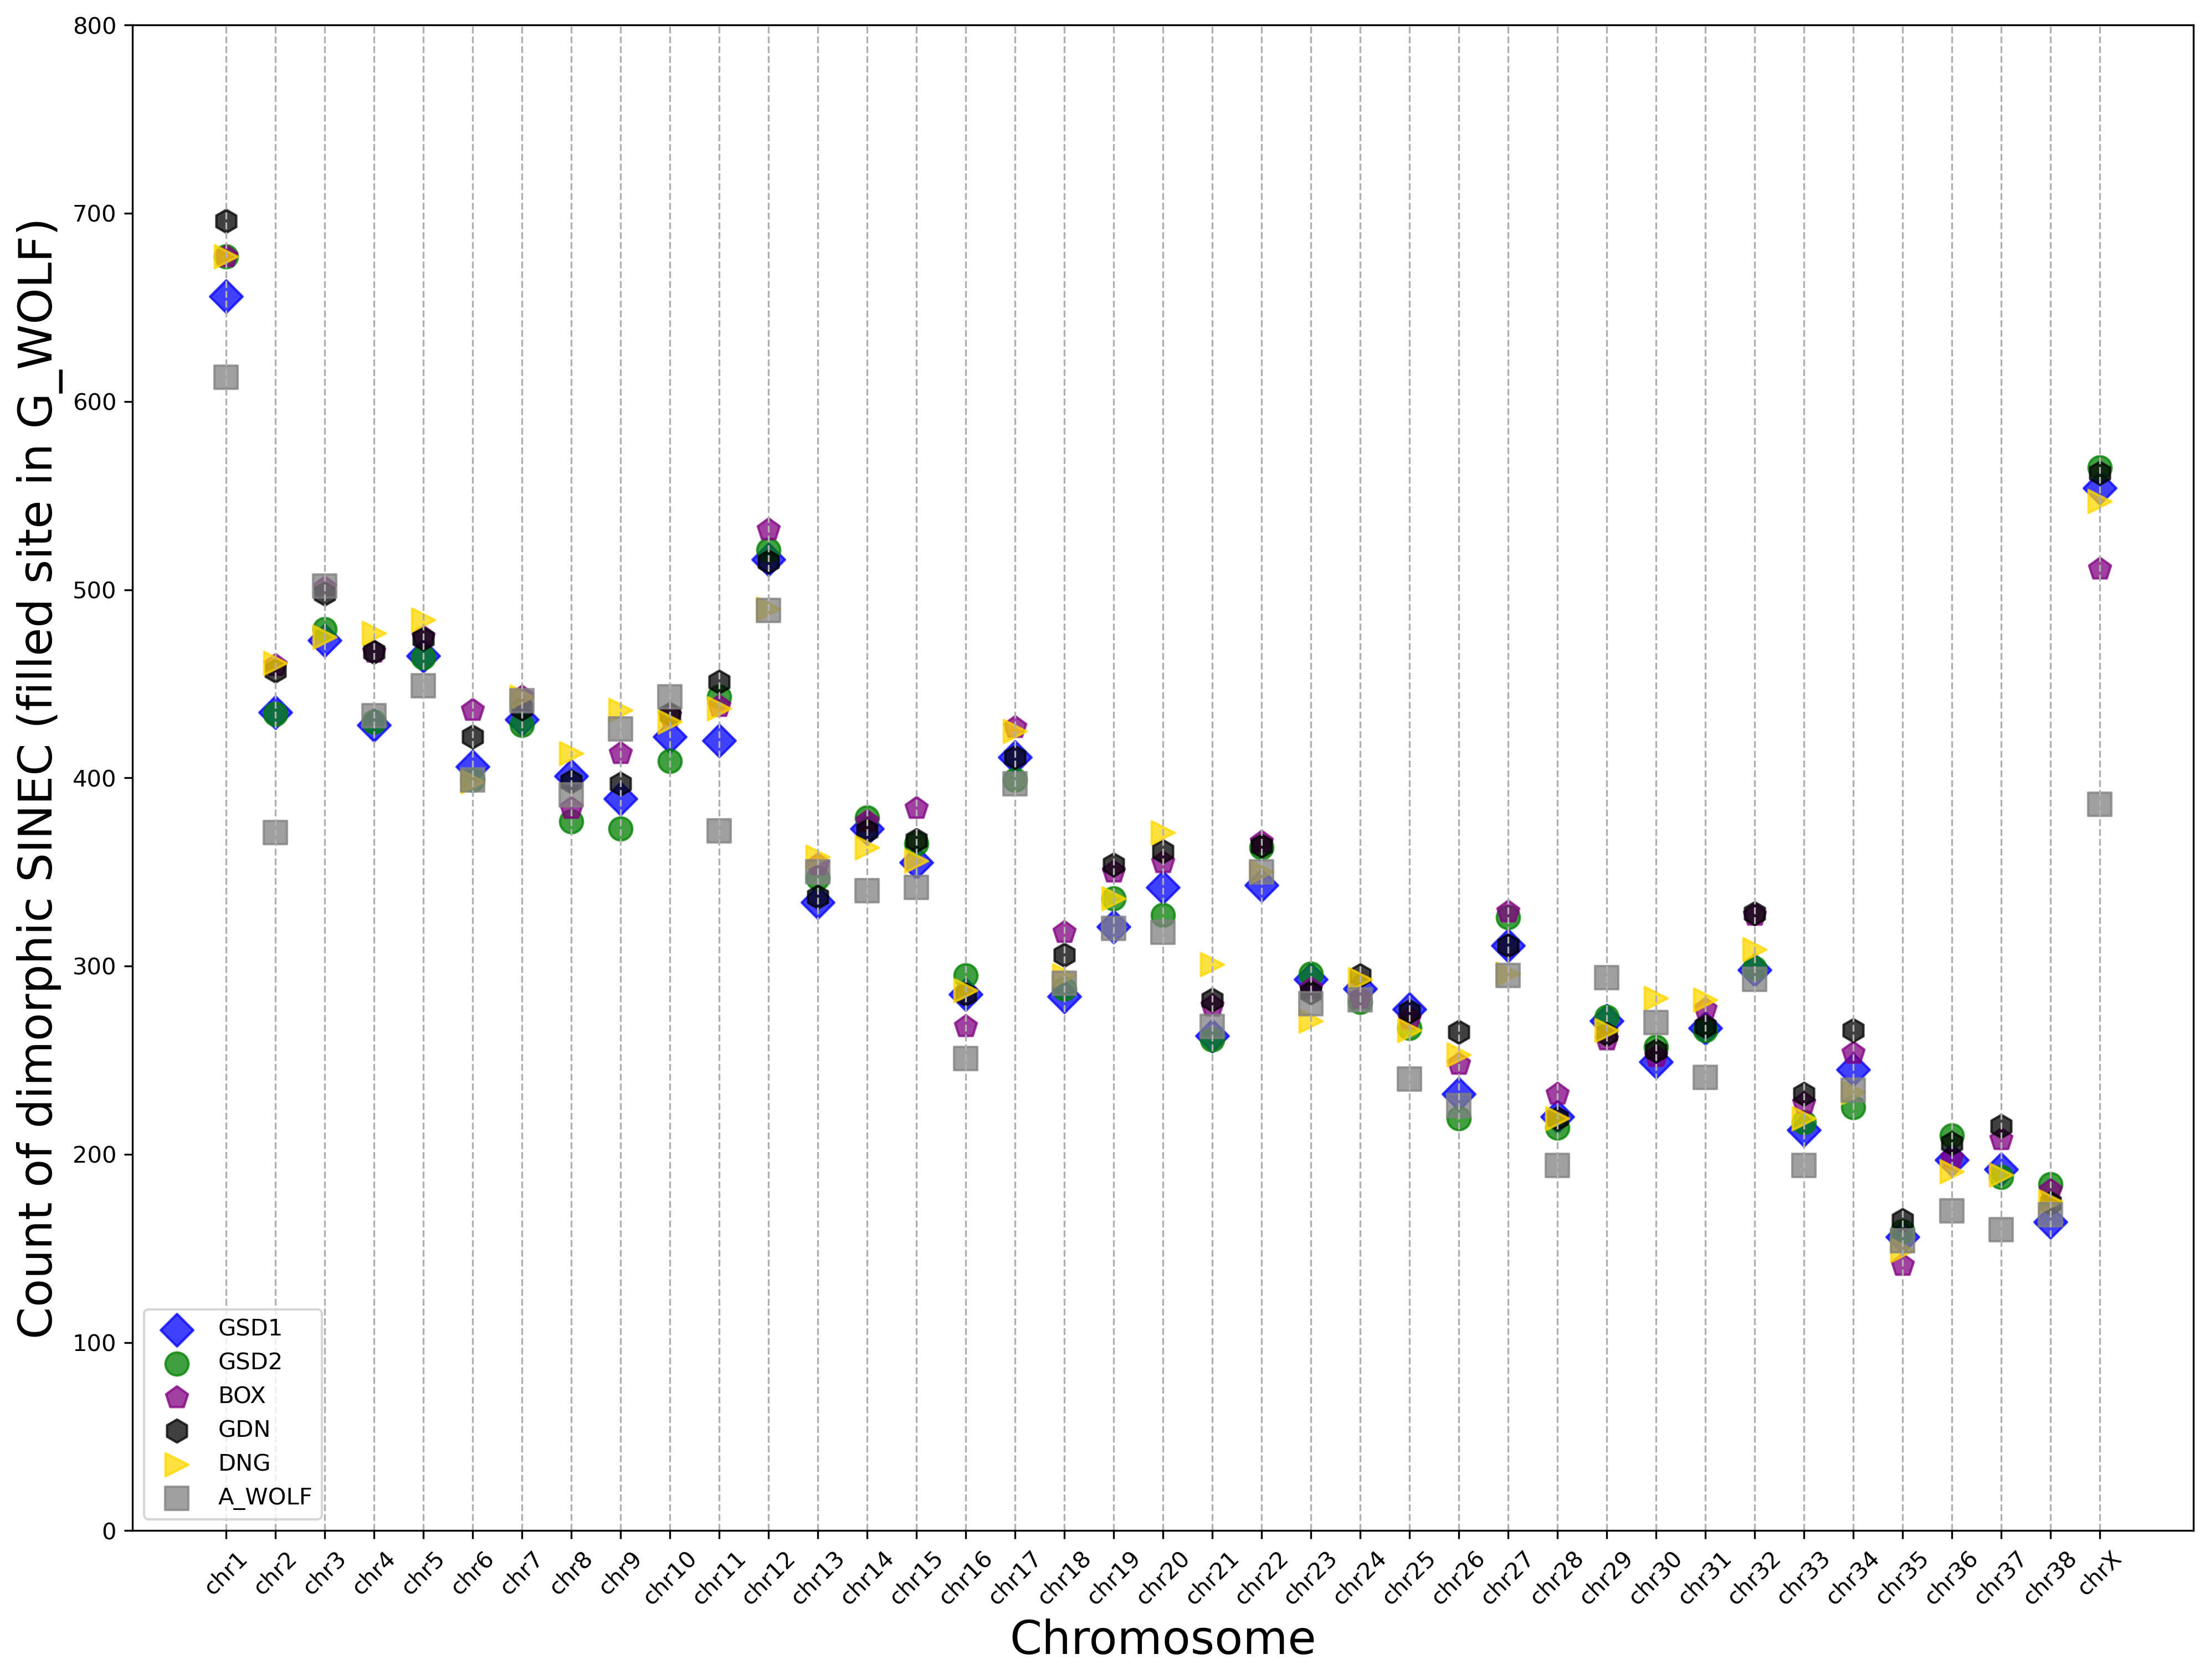

<Figure size 432x288 with 0 Axes>

In [3]:
#create all relevant permutations of file name
TEs = ["LINEs","SINEs"]
States = ['query','ref']


#set parameters for the final plot
TE_index = 0
State_index = 1
permutations = []
for TE in TEs:
    for State in States:
        permutations.append([TE,State])
print(permutations)
for permutation in permutations:
    if permutation[TE_index] == "SINEs":
        TE_name = "SINEC"
        max_height = 800
    elif permutation[TE_index] == "LINEs":
        TE_name = "LINE-1"
        max_height = 200
    if permutation[State_index] == "ref":
        info = "(filled site in G_WOLF)"
    elif permutation[State_index] == "query":
        info = "(filled site in sample)"
        
    list_of_genomes = ["Mischka","Nala","Tasha","Zoey","Sandy","Clu"]
    list_for_legend = ['GSD1',"GSD2","BOX","GDN",'DNG',"A_WOLF"]
    chrom_dict = {}
    total_dict ={}
    for genome in list_of_genomes:
        print(genome)
        chrom_dict = {}
        for item in chrom_list:
            chrom_dict[item] = 0
    
        #indent below this line.
        input_file = f"{dir_of_interest}/{genome}_mCanlor_SV_{permutation[State_index]}_filled_intersect_with_{permutation[TE_index]}_processed_filtered.bed"
        for file in [input_file]:
            with open(file,'rt') as infile:
                for line in infile:
                    line = line.split()
                    #if line[0] != line[3]:
                    #    continue
                    if line[0] in chrom_dict:
                        chrom_dict[line[0]] +=1
        total_dict[genome] = chrom_dict
        print(sum(total_dict[genome].values()))
        #print(chrom_dict)
    colors = ['blue','green','purple','black','gold','grey']
    markers = ['D','o','p','h','>','s']
    plt.figure(figsize=(16, 12),dpi=300)
    x_positions = np.arange(len(chrom_list))
    for i in range(len(list_of_genomes)):
        genome = list_of_genomes[i]
        counts = []
        for key in total_dict[genome].keys():
            counts.append(total_dict[genome][key])

        plt.scatter(chrom_list, counts, s=100, color=colors[i],alpha=.75,marker=markers[i]) 
    plt.xticks(x_positions, chrom_list,rotation=45)
    plt.xlabel('Values')
    #plt.title('Dot plot of SINECs present in sample, absent in G_WOLF, by chrom',size=20)
    plt.grid(axis='x', linestyle='--')
    plt.ylabel(f"Count of dimorphic {TE_name} {info}",size=20)
    plt.ylim(0,max_height)
    plt.xlabel("Chromosome",size=20)
    plt.legend(list_for_legend,loc='lower left')
    if not os.path.exists(f"{dir_of_interest}/chrom_scatterplots"):
        os.mkdir(f"{dir_of_interest}/chrom_scatterplots")
    plt.savefig(f"{dir_of_interest}/chrom_scatterplots/{permutation[TE_index]}_{permutation[State_index]}.png")
    plt.show()
    plt.clf()
    #plt.show()